C:\Users\ROG\AppData\Local\Temp\ipykernel_24808\3888719849.py:8: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)
C:\Users\ROG\AppData\Local\Temp\ipykernel_24808\3888719849.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')


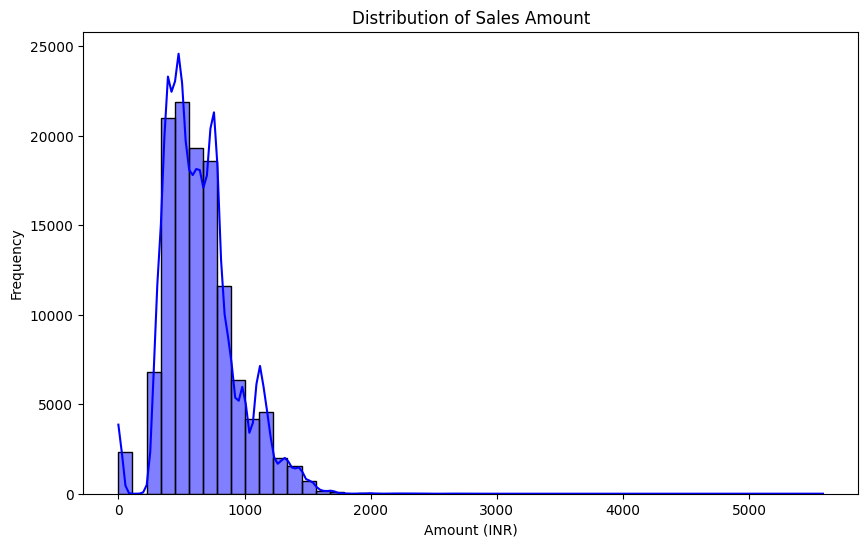

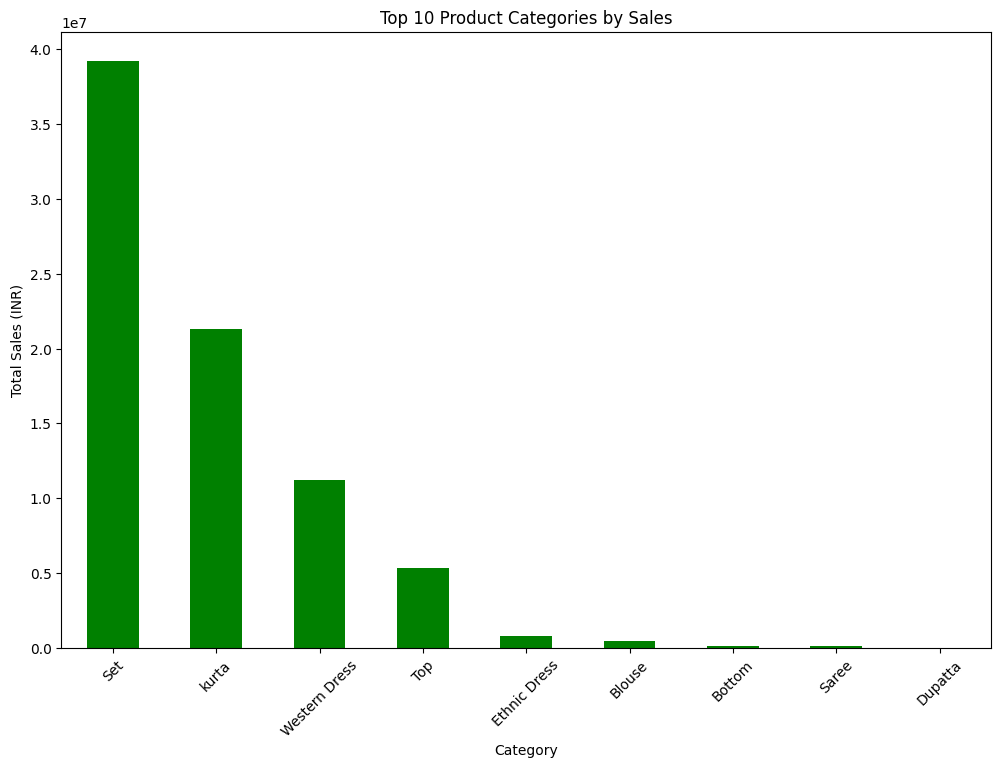

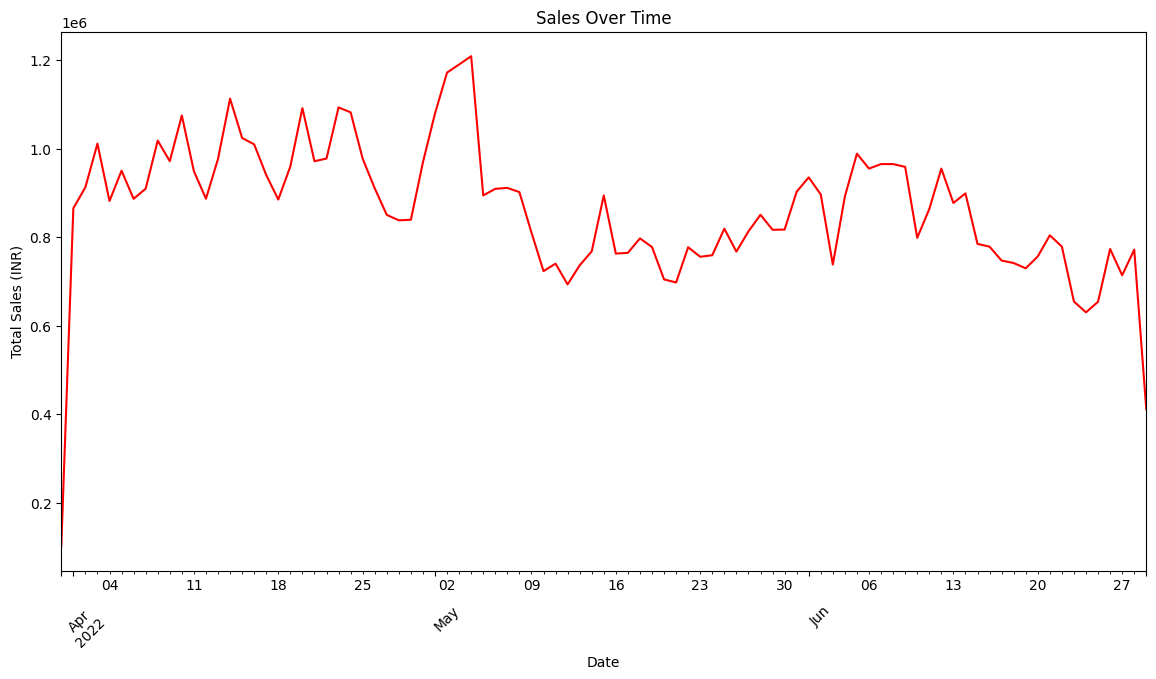

(index                     0
 Order ID                  0
 Date                      0
 Status                    0
 Fulfilment                0
 Sales Channel             0
 ship-service-level        0
 Style                     0
 SKU                       0
 Category                  0
 Size                      0
 ASIN                      0
 Courier Status         5136
 Qty                       0
 currency                  0
 Amount                    0
 ship-city                 0
 ship-state               31
 ship-postal-code         31
 ship-country             31
 promotion-ids         41698
 B2B                       0
 fulfilled-by          83639
 Unnamed: 22           46060
 dtype: int64,
 index                          int64
 Order ID                      object
 Date                  datetime64[ns]
 Status                        object
 Fulfilment                    object
 Sales Channel                 object
 ship-service-level            object
 Style                 

In [8]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Amazon_Sale_Report.csv'
data = pd.read_csv(file_path)

# Checking for missing values and data types
missing_values = data.isnull().sum()
data_types = data.dtypes

# Summary statistics for numerical columns
summary_statistics = data.describe()

# Checking for duplicate rows
duplicate_rows = data.duplicated().sum()

# Data Cleaning: Handle missing values
# Dropping rows with missing critical values like 'Amount' or 'Order ID'
data_cleaned = data.dropna(subset=['Amount', 'Order ID'])

# Dropping duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# Convert 'Date' to datetime
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# Handle missing values in other columns (e.g., imputation or removal)
# Example: Imputing missing values in 'ship-city' with 'Unknown'
data_cleaned['ship-city'] = data_cleaned['ship-city'].fillna('Unknown')

# Visualizing distribution of 'Amount' (Sales)
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Amount'], kde=True, color='blue', bins=50)
plt.title('Distribution of Sales Amount')
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.show()

# Plotting sales by category
plt.figure(figsize=(12, 8))
category_sales = data_cleaned.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
category_sales.plot(kind='bar', color='green')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.show()

# Plotting sales over time
sales_by_date = data_cleaned.groupby('Date')['Amount'].sum()

plt.figure(figsize=(14, 7))
sales_by_date.plot(kind='line', color='red')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.show()

# Checking for missing values after cleaning
cleaned_missing_values = data_cleaned.isnull().sum()
cleaned_data_types = data_cleaned.dtypes

# Return cleaned data information and visualizations
cleaned_missing_values, cleaned_data_types, summary_statistics.head()


In [24]:
# Importing required libraries for Association Rule Mining
from apyori import apriori
import pandas as pd

# Preparing the data for Association Rule Mining
# For market basket analysis, we need to create a list of transactions (items bought together)
transactions = data_cleaned.groupby('Order ID')['SKU'].apply(list).values.tolist()

# Checking the first few transactions to ensure the list is created correctly
print("First few transactions:", transactions[:5])

# Apply the Apriori algorithm with lower min_support and min_confidence
# min_support: Minimum support for the itemsets (set to 0.0005 for leniency)
# min_confidence: Minimum confidence for the rules (set to 0.1 for more rules)
# min_lift: Lift of the rules
rules = apriori(transactions, min_support=0.0005, min_confidence=0.1, min_lift=1)

# Convert results into a list
rules_list = list(rules)

# Inspect the rules
def inspect(rules_list):
    lhs = [tuple(rule[2][0][0])[0] for rule in rules_list]  # Left-hand side (LHS) of the rule
    rhs = [tuple(rule[2][0][1])[0] for rule in rules_list]  # Right-hand side (RHS) of the rule
    supports = [rule[1] for rule in rules_list]  # Support of the rule
    confidences = [rule[2][0][2] for rule in rules_list]  # Confidence of the rule
    lifts = [rule[2][0][3] for rule in rules_list]  # Lift of the rule
    
    # Create a DataFrame to display the results
    rules_df = pd.DataFrame({
        'LHS': lhs,
        'RHS': rhs,
        'Support': supports,
        'Confidence': confidences,
        'Lift': lifts
    })
    return rules_df.sort_values(by='Lift', ascending=False)

# Inspect the top association rules
association_rules = inspect(rules_list)

# Display the top 10 association rules
print("Top 10 Association Rules:")
print(association_rules.head(10))


First few transactions: [['JNE2032-KR-205-XL'], ['J0097-KR-M'], ['JNE3440-KR-N-XS'], ['SET291-KR-PP-L'], ['JNE3440-KR-N-XS']]
Top 10 Association Rules:
Empty DataFrame
Columns: [LHS, RHS, Support, Confidence, Lift]
Index: []


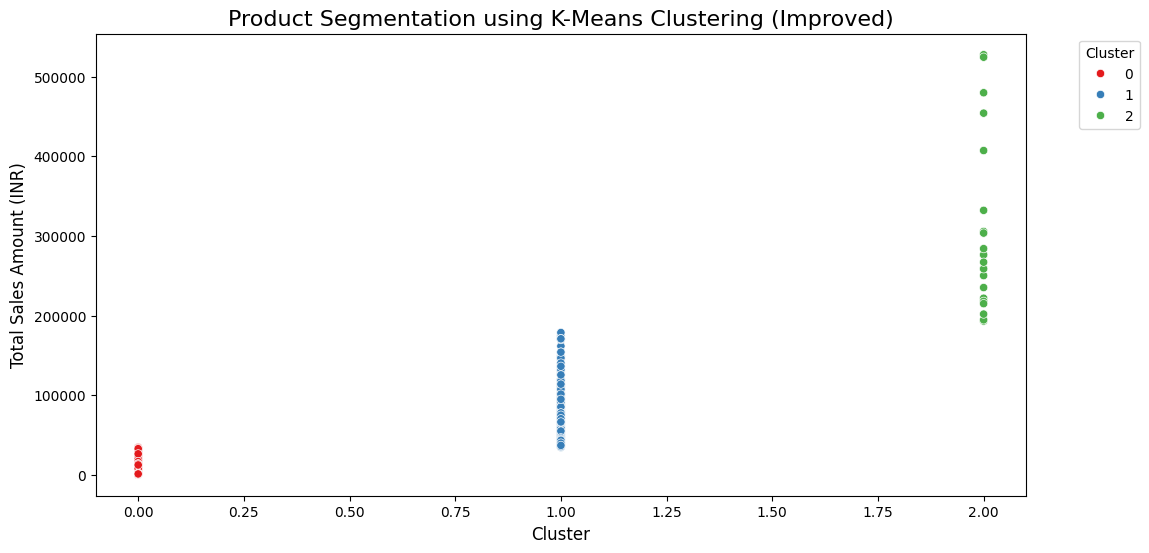

Cluster Centers (Average Sales Amount per Cluster):
   Sales Amount
0     -0.187986
1      2.108547
2     12.009238
Top 5 Products per Cluster by Sales:
                           SKU     Amount
Cluster                                  
0       348        J0004-SKD-L   34245.00
        5778   SET145-KR-NP-XL   34208.48
        3020    JNE3468-KR-XXL   34187.29
        7022    SET401-KR-NP-L   34137.29
        2372    JNE3160-KR-G-M   34108.66
1       1758      J0341-DR-XXL  178656.29
        378        J0008-SKD-M  174522.89
        6576    SET324-KR-NP-M  171020.92
        7001  SET397-KR-NP  -M  170781.59
        2724      JNE3405-KR-S  169808.87
2       1333       J0230-SKD-M  527699.20
        4518      JNE3797-KR-L  524581.77
        1334       J0230-SKD-S  479937.14
        4519      JNE3797-KR-M  454290.16
        4520      JNE3797-KR-S  407302.57


C:\Users\ROG\AppData\Local\Temp\ipykernel_24808\3408184607.py:38: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_products_per_cluster = product_sales.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Amount'))


In [ ]:
# Importing required libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregating data by SKU (product) and summing up the sales amount for each product
product_sales = data_cleaned.groupby('SKU')['Amount'].sum().reset_index()

# Standardizing the data for clustering (we standardize 'Amount' to make the data comparable)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(product_sales[['Amount']])

# Apply K-Means clustering (e.g., k=3 clusters for products)
kmeans = KMeans(n_clusters=3, random_state=42)
product_sales['Cluster'] = kmeans.fit_predict(scaled_data)

# Improved visualization for K-Means Clustering (scatter plot by cluster and sales)
plt.figure(figsize=(12, 6))

# Scatter plot: Showing clusters on x-axis and total sales on y-axis
sns.scatterplot(x='Cluster', y='Amount', hue='Cluster', data=product_sales, palette='Set1')

# Adding titles and labels
plt.title('Product Segmentation using K-Means Clustering', fontsize=16)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Total Sales Amount (INR)', fontsize=12)
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend
plt.show()

# Show the cluster centers (mean sales amount for each cluster)
cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=['Sales Amount'])
print("Cluster Centers (Average Sales Amount per Cluster):")
print(cluster_centers)

# Optionally, you can display top N products within each cluster
top_products_per_cluster = product_sales.groupby('Cluster').apply(lambda x: x.nlargest(5, 'Amount'))
print("Top 5 Products per Cluster by Sales:")
print(top_products_per_cluster[['SKU', 'Amount']])


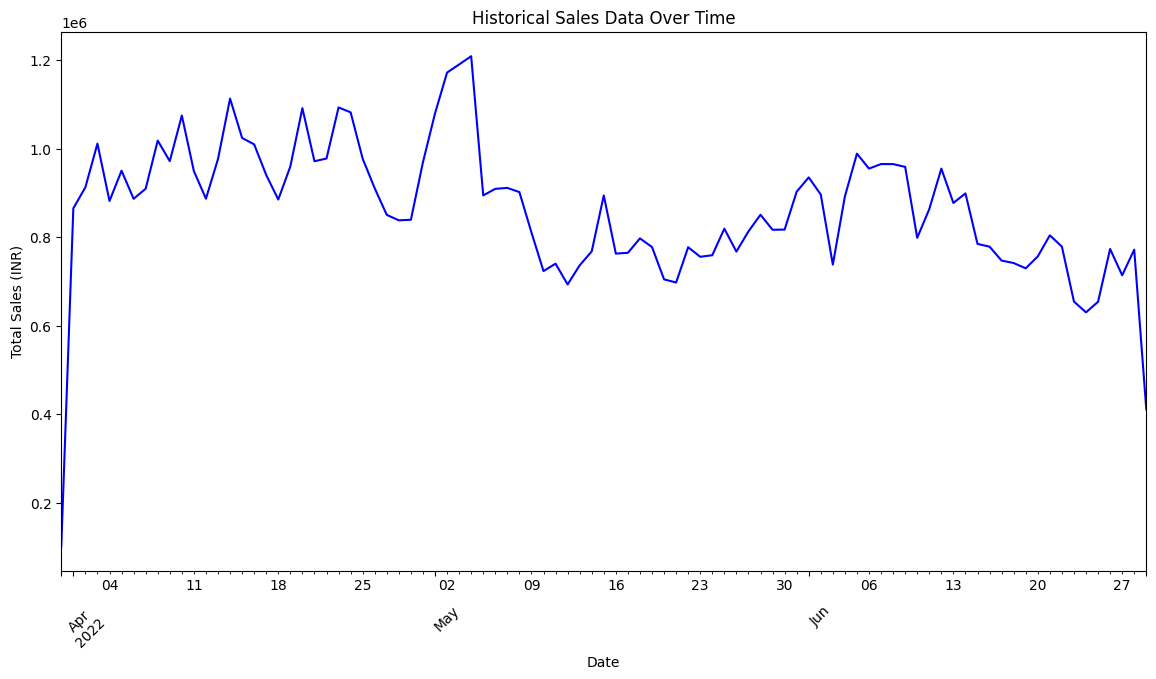

Date
2022-03-31     101683.85
2022-04-01     865478.60
2022-04-02     913101.53
2022-04-03    1011763.38
2022-04-04     882059.17
Name: Amount, dtype: float64


In [25]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Preparing the sales data by Date
# We will aggregate sales by Date and sum the Amount (total sales) per day
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')  # Ensure 'Date' is in datetime format
sales_by_date = data_cleaned.groupby('Date')['Amount'].sum()

# Plotting the historical sales data
plt.figure(figsize=(14, 7))
sales_by_date.plot(kind='line', color='blue')
plt.title('Historical Sales Data Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.show()

# Display the first few rows of the data
print(sales_by_date.head())


C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


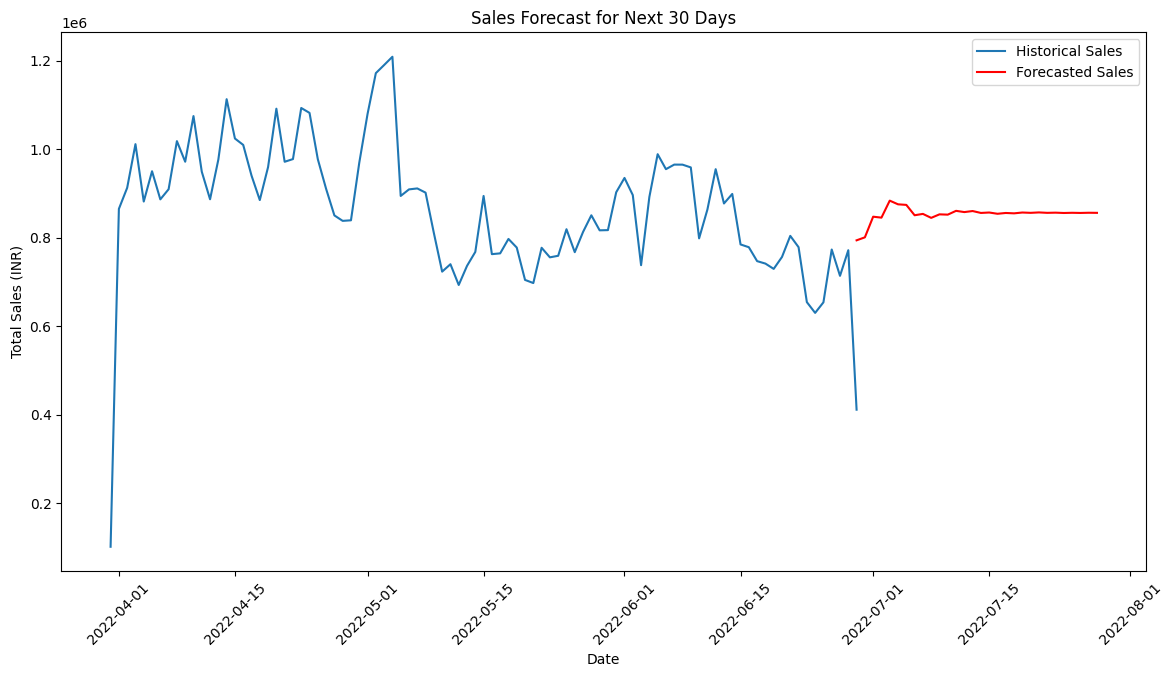

In [26]:
# Importing ARIMA and other necessary libraries for time series forecasting
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters

# Registering converters to avoid warnings
register_matplotlib_converters()

# We will train an ARIMA model on the sales data
# Splitting data into training and test set (using 80% for training, 20% for testing)
train_size = int(len(sales_by_date) * 0.8)
train, test = sales_by_date[:train_size], sales_by_date[train_size:]

# Fit the ARIMA model (p, d, q) — we use (5,1,0) for this example (you can optimize it later)
model = ARIMA(train, order=(5, 1, 0))  # ARIMA(p,d,q)
model_fit = model.fit()

# Forecasting the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the historical data along with the forecasted values
plt.figure(figsize=(14, 7))
plt.plot(sales_by_date.index, sales_by_date.values, label='Historical Sales')
plt.plot(pd.date_range(start=sales_by_date.index[-1], periods=30, freq='D'), forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.legend()
plt.xticks(rotation=45)
plt.show()
